<a href="https://colab.research.google.com/github/JustineDataEng/Retail-Intelligence-System/blob/main/01_Data_Invention_and_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Reliable data source for Online Retail II
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx"

print(" Attempting to fetch Excel data from UCI Repository...")

try:
    # This might take a minute as it's a large file
    df = pd.read_excel(data_url)
    print(f"✅ Success! Data fetched. Total records: {len(df)}")
    print(df.head())
except Exception as e:
    print(f"❌ Error: {e}")

 Attempting to fetch Excel data from UCI Repository...
✅ Success! Data fetched. Total records: 525461
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [3]:
# Testing the Premium Engine
from premium_engine import RetailEngine

engine = RetailEngine(df) # Create the engine
clean_data = engine.professional_clean() # Run the professional clean

✅ Premium Engine: 407664 records ready.


In [4]:
from premium_engine import RetailEngine

# 1. Initialize
engine = RetailEngine(df)

# 2. Clean
engine.professional_clean()

# 3. Get results
results = engine.calculate_rfm()
results.head()

✅ Premium Engine: 407664 records ready.


,Recency,Frequency,Monetary
Customer ID,,,
12346.0,165,11,372.86
12347.0,3,2,1323.32
12348.0,74,1,222.16
12349.0,43,3,2671.14
12351.0,11,1,300.93


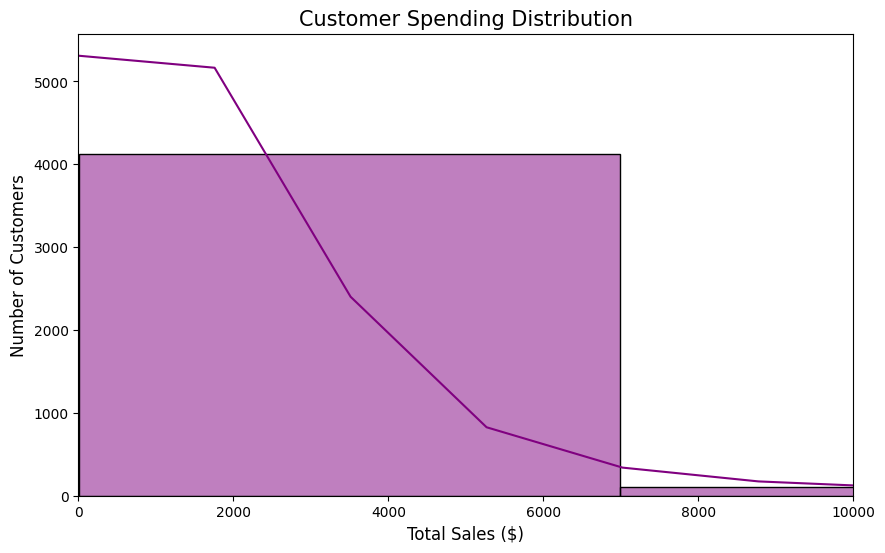

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Looking at the distribution of 'Monetary' (Spending)
plt.figure(figsize=(10, 6))
sns.histplot(results['Monetary'], bins=50, kde=True, color='purple')
plt.title('Customer Spending Distribution', fontsize=15)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlim(0, 10000) # Zooming in so the outliers don't hide the data
plt.show()

In [6]:
# 1. Create Quartiles for Recency, Frequency, and Monetary
# This ranks customers from 1 to 4 (4 is the best)
results['R_score'] = pd.qcut(results['Recency'], 4, labels=[4, 3, 2, 1])
results['F_score'] = pd.qcut(results['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
results['M_score'] = pd.qcut(results['Monetary'], 4, labels=[1, 2, 3, 4])

# 2. Combine scores to create an RFM Segment
results['RFM_Score'] = results['R_score'].astype(str) + results['F_score'].astype(str) + results['M_score'].astype(str)

# 3. Define the Segments (The Quality Niche)
def segment_me(df):
    if df['RFM_Score'] == '444':
        return 'Champions'
    elif df['R_score'] == 1:
        return 'At Risk / Lost'
    elif df['M_score'] == 4:
        return 'Big Spenders'
    else:
        return 'Regulars'

results['Segment'] = results.apply(segment_me, axis=1)

print("Segmentation Complete!")
print(results['Segment'].value_counts())

Segmentation Complete!
Segment
Regulars          2217
At Risk / Lost    1076
Big Spenders       561
Champions          458
Name: count, dtype: int64


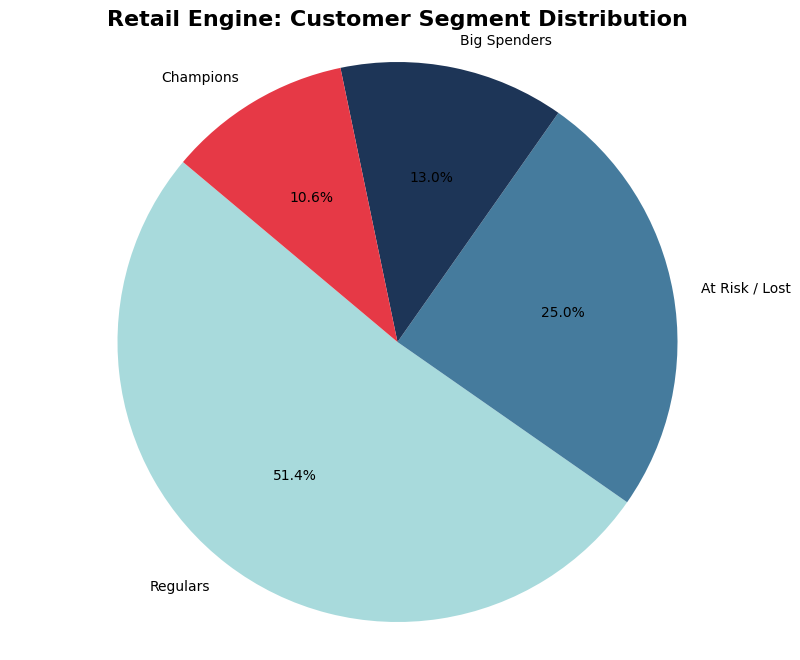

In [7]:
import matplotlib.pyplot as plt

# 1. Prepare data for the pie chart
segment_counts = results['Segment'].value_counts()

# 2. Plotting
plt.figure(figsize=(10, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%',
        startangle=140, colors=['#A8DADC', '#457B9D', '#1D3557', '#E63946'])
plt.title('Retail Engine: Customer Segment Distribution', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

In [8]:
from premium_engine import RetailEngine

# 1. Test Initialization
engine = RetailEngine(df)

# 2. Test Professional Cleaning
# Removes 'C' invoices and null Customer IDs
engine.professional_clean()

# 3. Test RFM Generation
# Calculates Recency, Frequency, and Monetary metrics
rfm_results = engine.calculate_rfm()

# 4. Test Forecasting
# Predicts revenue for the next 7 days based on a 30-day window
forecast = engine.predict_sales_trend()

print(f"Engine Check: Complete. Forecasted Revenue: {forecast}")

✅ Premium Engine: 407664 records ready.
✅ Premium Engine: Average Daily Revenue is $37818.26
🚀 Forecast: Predicted Revenue for next 7 days: $264727.85
Engine Check: Complete. Forecasted Revenue: 264727.85289999994


In [10]:
# Save to a file for download
results.to_csv('final_customer_segments.csv')
print("Results have been saved to 'final_customer_segments.csv'!")

Results have been saved to 'final_customer_segments.csv'!
